#  2019未来杯高校AI挑战赛 > 城市-房产租金预测
大赛链接:(https://2019ai.futurelab.tv/contest_detail/3#contest_index)

## 了解比赛的背景

- 线上比赛,要求参赛选手根据给定的数据集，建立模型，预测房屋租金。
- 回归问题

## 比赛数据EDA

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train_data = pd.read_csv("./train_data.csv")
test_data = pd.read_csv("./test_a.csv")

In [4]:
print('train_data.shape = {}'.format(train_data.shape)) 
print('test_data.shape = {}'.format(test_data.shape))

train_data.shape = (41440, 51)
test_data.shape = (2469, 50)


In [5]:
train_data.head()

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,region,plate,buildYear,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,drugStoreNum,gymNum,bankNum,shopNum,parkNum,mallNum,superMarketNum,totalTradeMoney,totalTradeArea,tradeMeanPrice,tradeSecNum,totalNewTradeMoney,totalNewTradeArea,tradeNewMeanPrice,tradeNewNum,remainNewNum,supplyNewNum,supplyLandNum,supplyLandArea,tradeLandNum,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
0,100309852,68.06,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,SH,RG00001,BK00064,1953,0,7,36,0,28,1,1,12,15,16,76,5,3,22,355584000,7411.98,47974.22551,111,810967373,7755,104573.48460,25,264,0,0,0.0,0,0.0,0,0.0000,28248,614,111546,1124.0,284.0,0,2018/11/28,2000.0
1,100307942,125.55,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,SH,RG00002,BK00049,2007,0,2,184,0,26,0,1,27,5,16,163,6,4,51,5000000,122.83,40706.66775,2,9668955,286,33807.53497,2,4,0,0,0.0,0,0.0,0,0.0000,14823,148,157552,701.0,22.0,1,2018/12/16,2000.0
2,100307764,132.00,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,SH,RG00002,BK00050,暂无信息,3,6,60,1,43,2,3,24,35,37,85,6,4,30,1687284798,49071.30,34384.35089,555,344894466,3143,109734.16040,11,159,126,0,0.0,0,0.0,0,0.0000,77645,520,131744,57.0,20.0,1,2018/12/22,16000.0
3,100306518,57.00,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,SH,RG00002,BK00051,暂无信息,0,3,364,2,60,1,8,83,30,47,358,3,1,131,468272888,22809.70,20529.55050,260,196307819,6418,30587.07058,58,730,0,1,108037.8,1,108037.8,332760000,3080.0331,8750,1665,253337,888.0,279.0,9,2018/12/21,1600.0
4,100305262,129.00,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,SH,RG00003,BK00044,暂无信息,1,0,141,0,15,0,0,21,5,10,100,5,2,34,108851470,4463.62,24386.36577,38,286722058,5608,51127.32846,34,851,216,0,0.0,0,0.0,0,0.0000,800,117,125309,2038.0,480.0,0,2018/11/18,2900.0


### 1.缺失值分析

In [6]:
train_data.isnull().sum()

ID                     0
area                   0
rentType               0
houseType              0
houseFloor             0
totalFloor             0
houseToward            0
houseDecoration        0
communityName          0
city                   0
region                 0
plate                  0
buildYear              0
saleSecHouseNum        0
subwayStationNum       0
busStationNum          0
interSchoolNum         0
schoolNum              0
privateSchoolNum       0
hospitalNum            0
drugStoreNum           0
gymNum                 0
bankNum                0
shopNum                0
parkNum                0
mallNum                0
superMarketNum         0
totalTradeMoney        0
totalTradeArea         0
tradeMeanPrice         0
tradeSecNum            0
totalNewTradeMoney     0
totalNewTradeArea      0
tradeNewMeanPrice      0
tradeNewNum            0
remainNewNum           0
supplyNewNum           0
supplyLandNum          0
supplyLandArea         0
tradeLandNum           0


In [7]:
test_data.isnull().sum()

ID                    0
area                  0
rentType              0
houseType             0
houseFloor            0
totalFloor            0
houseToward           0
houseDecoration       0
communityName         0
city                  0
region                0
plate                 0
buildYear             0
saleSecHouseNum       0
subwayStationNum      0
busStationNum         0
interSchoolNum        0
schoolNum             0
privateSchoolNum      0
hospitalNum           0
drugStoreNum          0
gymNum                0
bankNum               0
shopNum               0
parkNum               0
mallNum               0
superMarketNum        0
totalTradeMoney       0
totalTradeArea        0
tradeMeanPrice        0
tradeSecNum           0
totalNewTradeMoney    0
totalNewTradeArea     0
tradeNewMeanPrice     0
tradeNewNum           0
remainNewNum          0
supplyNewNum          0
supplyLandNum         0
supplyLandArea        0
tradeLandNum          0
tradeLandArea         0
landTotalPrice  

#### 只有pv和uv有缺失,缺失成对出现,具体含义是:  *该板块当月租客浏览网页次数和总人数*,
- 可以用该板块的中位数代替填充
- 直接删除有缺失值的行

In [8]:
# train_data["plate"].value_counts()
# train_data.groupby(["plate"])["pv","uv"].agg(["median"])
# loc = train_data["pv"][train_data["pv"].isnull().values==True].index.tolist()# 有缺失值的索引
# train_data.loc[4370]["plate"]
# # train_data.loc[train_data['pv'].isnull(),'pv']=train_data[train_data['pv'].isnull()][‘name’]


In [9]:
train_data = train_data.dropna(axis=0, how='any')   # 直接删除行

In [10]:
train_data.isnull().sum().sum()

0

### 2.特征值分析（皮尔森相关系数）

In [11]:
# 皮尔森相关系数
for col in train_data.columns:
    if train_data[col].dtype != "object":
        corre=train_data[col].corr(train_data["tradeMoney"],method='pearson')#方法选择person相关性
        print("{}    's corr is    {}".format(col,corre))

ID    's corr is    -0.008347551438725224
area    's corr is    0.0067176926097662175
totalFloor    's corr is    0.006359155805704709
saleSecHouseNum    's corr is    0.00039105278045293884
subwayStationNum    's corr is    -0.0007335619974489786
busStationNum    's corr is    -0.004739207345921053
interSchoolNum    's corr is    0.00775700524278902
schoolNum    's corr is    0.0005682210229050129
privateSchoolNum    's corr is    0.006594907354912638
hospitalNum    's corr is    -0.00445502912718004
drugStoreNum    's corr is    -0.004453854987413408
gymNum    's corr is    0.009296062921550642
bankNum    's corr is    0.01953480197632846
shopNum    's corr is    -0.0038157110212892506
parkNum    's corr is    0.0016555313032055967
mallNum    's corr is    0.009276399410932383
superMarketNum    's corr is    -0.0038091398000632062
totalTradeMoney    's corr is    0.005548789556211566
totalTradeArea    's corr is    0.00040950618643748846
tradeMeanPrice    's corr is    0.006976825554

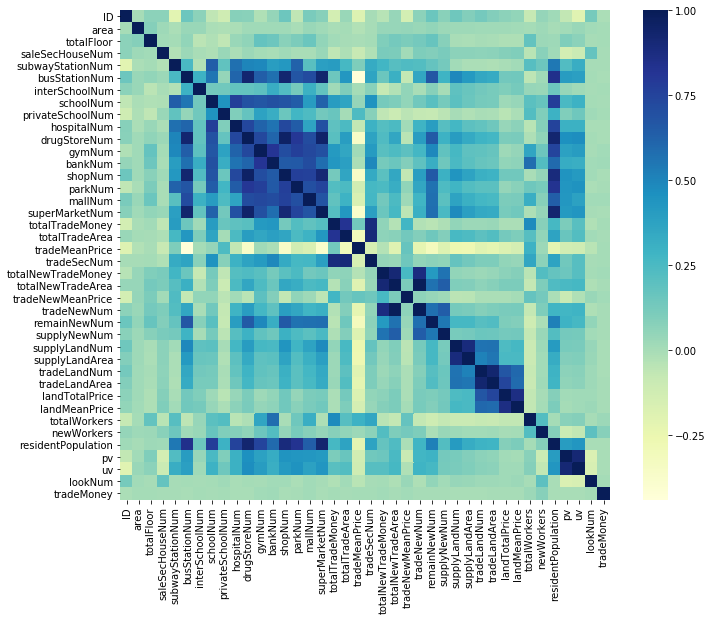

In [12]:
corrmat = train_data.corr()
f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat,square = True,cmap="YlGnBu")

### 3.特征nunique分布

In [13]:
columns = train_data.columns[:-1]  # 去掉tradeMoney

In [14]:
bigeer = []
for col in columns:
    print(col,train_data[col].nunique(),test_data[col].nunique())
    if train_data[col].nunique()> 100:
        bigeer.append(col)
        

ID 41422 2469
area 10351 1677
rentType 3 3
houseType 104 31
houseFloor 3 3
totalFloor 55 39
houseToward 10 8
houseDecoration 4 4
communityName 4236 2469
city 1 1
region 15 14
plate 66 63
buildYear 80 67
saleSecHouseNum 28 13
subwayStationNum 13 13
busStationNum 59 56
interSchoolNum 7 7
schoolNum 44 44
privateSchoolNum 17 17
hospitalNum 11 11
drugStoreNum 42 41
gymNum 39 38
bankNum 45 42
shopNum 56 53
parkNum 18 18
mallNum 17 17
superMarketNum 49 47
totalTradeMoney 704 530
totalTradeArea 705 530
tradeMeanPrice 705 530
tradeSecNum 333 301
totalNewTradeMoney 557 410
totalNewTradeArea 532 395
tradeNewMeanPrice 556 410
tradeNewNum 157 134
remainNewNum 391 319
supplyNewNum 104 82
supplyLandNum 4 4
supplyLandArea 54 47
tradeLandNum 5 5
tradeLandArea 46 38
landTotalPrice 46 38
landMeanPrice 52 40
totalWorkers 63 60
newWorkers 178 128
residentPopulation 63 60
pv 709 537
uv 649 505
lookNum 32 17
tradeTime 361 331


In [15]:
bigeer  # 统计特征值出现频次大于100的特征

['ID',
 'area',
 'houseType',
 'communityName',
 'totalTradeMoney',
 'totalTradeArea',
 'tradeMeanPrice',
 'tradeSecNum',
 'totalNewTradeMoney',
 'totalNewTradeArea',
 'tradeNewMeanPrice',
 'tradeNewNum',
 'remainNewNum',
 'supplyNewNum',
 'newWorkers',
 'pv',
 'uv',
 'tradeTime']

### 训练集和测试集数据不统一

### 4. label分析

G:\tools\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


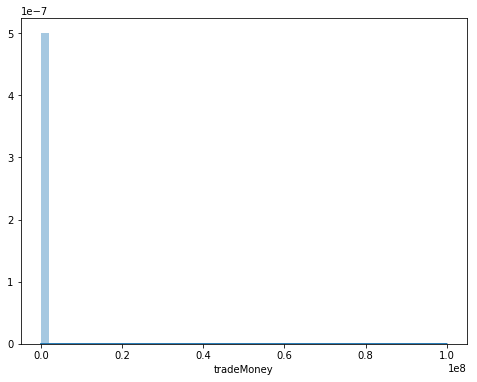

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(train_data['tradeMoney'])
# tradeMoney = train_data['tradeMoney']
# plt.hist(tradeMoney)#,bins=20)

### 出现长尾情况，label最好服从正态分布，需要删除离群点

### 5.分析area和tradeMoney关系

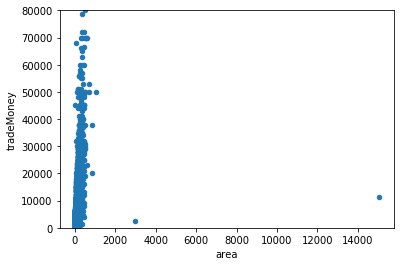

In [17]:
data = pd.concat([train_data["tradeMoney"],train_data["area"]],axis = 1)
data.plot.scatter(x = "area",y = "tradeMoney",ylim=(0,80000)) #离群点？连

### 可以删除掉面积大且价格低的明显的异常值

### 6.地区与价格之间的关系

(-0.5, 14.5, 0, 15000)

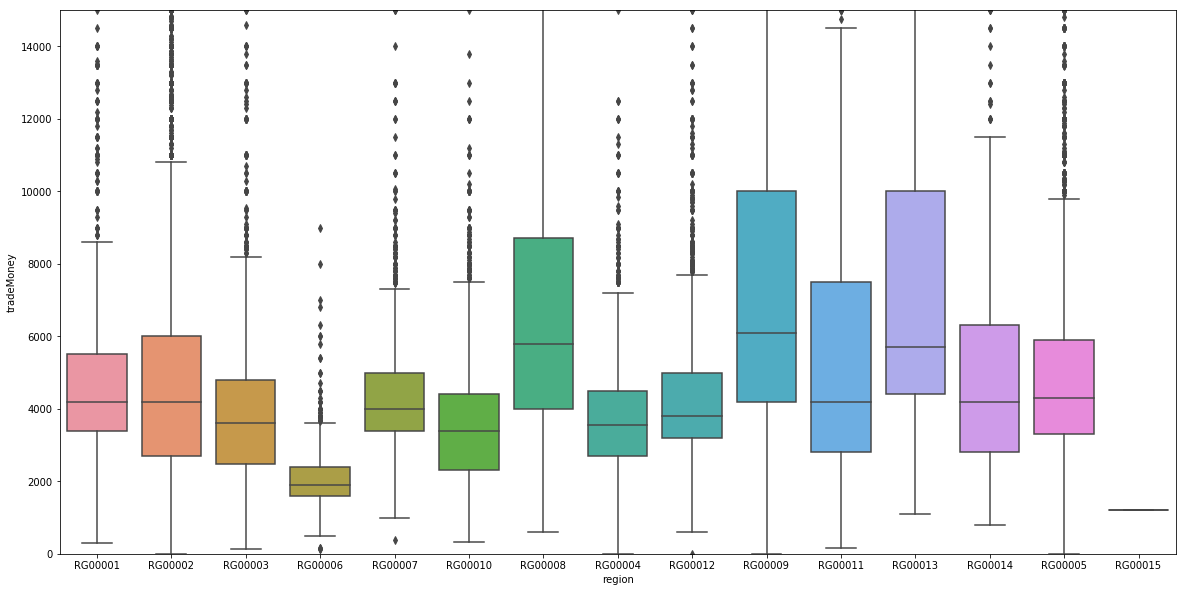

In [18]:
data = pd.concat([train_data["tradeMoney"],train_data["region"]],axis = 1)
f,ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x = 'region',y = "tradeMoney",data = data )
fig.axis(ymin=0,ymax = 15000)

### 7 其他

In [19]:
train_data.describe()

,ID,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,drugStoreNum,gymNum,bankNum,shopNum,parkNum,mallNum,superMarketNum,totalTradeMoney,totalTradeArea,tradeMeanPrice,tradeSecNum,totalNewTradeMoney,totalNewTradeArea,tradeNewMeanPrice,tradeNewNum,remainNewNum,supplyNewNum,supplyLandNum,supplyLandArea,tradeLandNum,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeMoney
count,4.142200e+04,41422.000000,41422.000000,41422.000000,41422.000000,41422.000000,41422.000000,41422.000000,41422.000000,41422.000000,41422.000000,41422.000000,41422.000000,41422.000000,41422.000000,41422.000000,41422.000000,4.142200e+04,41422.000000,41422.000000,41422.000000,4.142200e+04,41422.000000,41422.000000,41422.000000,41422.000000,41422.000000,41422.000000,41422.000000,41422.000000,41422.000000,4.142200e+04,41422.000000,41422.000000,41422.000000,41422.000000,41422.000000,41422.000000,41422.000000,4.142200e+04
mean,1.001220e+08,70.966477,11.412583,1.338757,5.742383,187.268070,1.506615,48.230216,6.274202,4.308001,57.775313,36.014799,49.055333,270.719183,8.175317,6.269857,83.118874,6.849892e+08,18237.608289,40149.118241,222.091835,3.685557e+08,6868.116822,47154.517607,57.996355,370.687847,78.398870,0.179397,15044.320979,0.147796,12626.891078,1.045818e+08,725.078866,77239.064145,1137.412438,294611.616774,26945.663512,3089.077085,0.394887,8.837961e+03
std,9.370226e+04,88.135159,7.373191,3.180952,4.605575,179.681443,1.687964,29.574795,4.946310,3.360259,40.082665,20.453710,34.511990,187.272636,6.916671,4.499325,60.625774,4.515643e+08,11840.400801,13220.261796,134.119287,6.446675e+08,11885.996794,35098.720116,108.495845,488.268250,194.302031,0.529242,50249.920695,0.557355,49863.256852,5.216304e+08,3224.968929,132080.110242,7669.035626,196732.210096,32174.637924,2954.706517,1.650725,5.515485e+05
min,1.000000e+08,1.000000,0.000000,0.000000,0.000000,24.000000,0.000000,9.000000,0.000000,0.000000,8.000000,1.000000,7.000000,10.000000,0.000000,0.000000,5.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,600.000000,0.000000,49330.000000,17.000000,6.000000,0.000000,0.000000e+00
25%,1.000470e+08,42.620000,6.000000,0.000000,2.000000,74.000000,0.000000,24.000000,2.000000,1.000000,33.000000,25.000000,24.000000,154.000000,4.000000,3.000000,46.000000,3.932300e+08,9254.170000,31147.211540,127.000000,6.841255e+06,160.000000,29084.713320,1.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,13983.000000,0.000000,165293.000000,7928.000000,1053.000000,0.000000,2.800000e+03
50%,1.000959e+08,65.000000,7.000000,0.000000,5.000000,128.000000,1.000000,47.000000,5.000000,4.000000,40.000000,34.000000,41.000000,214.000000,6.000000,5.000000,61.000000,5.718662e+08,15962.430000,39430.856560,195.000000,1.042774e+08,1618.000000,41788.375860,9.000000,214.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,38947.000000,0.000000,245872.000000,20196.000000,2375.000000,0.000000,4.000000e+03
75%,1.001901e+08,90.000000,16.000000,1.000000,7.000000,258.000000,3.000000,61.000000,9.000000,6.000000,83.000000,41.000000,62.000000,341.000000,10.000000,7.000000,119.000000,8.781700e+08,24988.510000,49738.263640,301.000000,4.029358e+08,8995.000000,68808.852910,64.000000,526.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,76668.000000,0.000000,330610.000000,34485.000000,4233.000000,0.000000,5.500000e+03
max,1.003218e+08,15055.000000,88.000000,52.000000,22.000000,824.000000,8.000000,142.000000,24.000000,14.000000,174.000000,88.000000,207.000000,824.000000,30.000000,19.000000,299.000000,2.402060e+09,60550.850000,112471.174100,675.000000,4.451044e+09,85922.000000,299318.753400,825.000000,5290.000000,1347.000000,3.000000,555508.010000,5.000000,555508.010000,6.197570e+09,37513.062490,855400.000000,143700.0000

## 总结